In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.0 MB/s eta 0:00:00


In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 67.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 49.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.1-py3-none-any.whl size=25313921 sha256

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2021_altın_mudahale/test.csv', encoding='latin-1')

In [ ]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"50,000 finnish industrial workers threaten str...",0.000000,0.000000,Neutral
1,1,happened btc$100k eoy ð¤·ââï¸ reminds fo...,0.000000,0.000000,Neutral
2,2,plop supercooled ice ð¦ copper gold swimming...,0.400000,-0.150000,Negative
3,3,jp morgan turns bearish anything-- especially ...,1.000000,0.000000,Neutral
4,4,2021 year clean energy finally faced mining pr...,0.679451,0.157656,Positive


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2021_altın_mudahale/test.csv', encoding='latin-1')

In [ ]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"50,000 finnish industrial workers threaten str...",0.000000,0.000000,Neutral
1,1,happened btc$100k eoy ð¤·ââï¸ reminds fo...,0.000000,0.000000,Neutral
2,2,plop supercooled ice ð¦ copper gold swimming...,0.400000,-0.150000,Negative
3,3,jp morgan turns bearish anything-- especially ...,1.000000,0.000000,Neutral
4,4,2021 year clean energy finally faced mining pr...,0.679451,0.157656,Positive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [ ]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [ ]:
len(X_train), len(X_test)

(6000, 6000)

In [ ]:
# Building model with transformer
model_name = 'roberta-base'

trans = text.Transformer(model_name, maxlen=128)

In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 16
	95percentile : 35
	99percentile : 43


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 35
	99percentile : 43


In [ ]:
# getting roberta-base model.
model = trans.get_classifier() # AUC(name='auc') from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


In [ ]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 8)

In [ ]:

#history = learner.fit_onecycle(1e-5, 3)
history = learner.autofit(1e-5, 5)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/5
750/750 [==============================] - 75s 73ms/step - loss: 0.4599 - accuracy: 0.8162 - val_loss: 0.0650 - val_accuracy: 0.9838
Epoch 2/5
750/750 [==============================] - 53s 69ms/step - loss: 0.0770 - accuracy: 0.9795 - val_loss: 0.0245 - val_accuracy: 0.9928
Epoch 3/5
750/750 [==============================] - 53s 69ms/step - loss: 0.0355 - accuracy: 0.9898 - val_loss: 0.0118 - val_accuracy: 0.9977
Epoch 4/5
750/750 [==============================] - 53s 69ms/step - loss: 0.0239 - accuracy: 0.9942 - val_loss: 0.0068 - val_accuracy: 0.9988
Epoch 5/5
750/750 [==============================] - 53s 70ms/step - loss: 0.0262 - accuracy: 0.9925 - val_loss: 0.0076 - val_accuracy: 0.9983


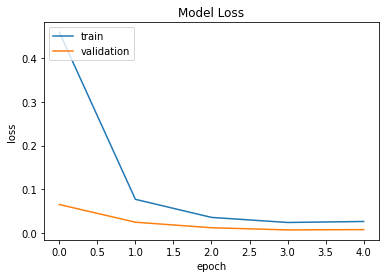

In [ ]:
learner.plot('loss')

In [ ]:
learner.validate()

188/188 [==============================] - 12s 48ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       725
           1       1.00      1.00      1.00      3349
           2       1.00      1.00      1.00      1926

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



array([[ 724,    0,    1],
       [   2, 3342,    5],
       [   0,    2, 1924]])